In [3]:
#2 variánssal bíró vírus SIR
import numpy as np

#SIR-ből SIR-D
beta_1 = 10   # b
beta_2 = 1.5  # a
gamma_1 = 1   # b
gamma_2 = 1   # a
mu_1 = 0.0001 # b 
mu_2 = 0.01   # a

T=10
dt=0.001
nsteps=round(T/dt)
v_S=np.zeros([nsteps+1])
v_I_1=np.zeros([nsteps+1])
v_I_2=np.zeros([nsteps+1])
v_R=np.zeros([nsteps+1])
v_D=np.zeros([nsteps+1])
v_S[0]=0.99
v_I_1[0] = 0.0
v_I_2[0] = 0.01

for t in range(nsteps):
    mu_1_ = mu_1+mu_1*v_I_1[t]
    mu_2_ = mu_2+mu_2*v_I_2[t]
    v_S[t+1]=v_S[t]-dt*v_S[t]*(beta_1*v_I_1[t]+beta_2*v_I_2[t])
    v_I_1[t+1]=v_I_1[t]+dt*beta_1*v_S[t]*v_I_1[t]-gamma_1*v_I_1[t]*dt
    v_I_2[t+1]=v_I_2[t]+dt*beta_2*v_S[t]*v_I_2[t]-gamma_2*v_I_2[t]*dt
    v_R[t+1]=v_R[t]+(1-mu_1_)*gamma_1*v_I_1[t]*dt+(1-mu_2_)*gamma_2*v_I_2[t]*dt
    v_D[t+1]=v_D[t]+mu_1_*gamma_1*v_I_1[t]*dt+mu_2_*gamma_2*v_I_2[t]*dt
#for i in v_I:
#    print(i/10)

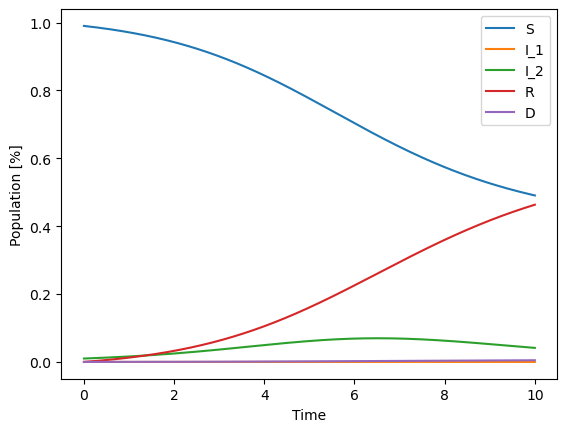

In [4]:
#SIRD diagram for 2 versions of the virus
import matplotlib.pyplot as plt
trange=[t*dt for t in range(nsteps+1)]
plt.figure()
plt.plot(trange,v_S,label='S')
plt.plot(trange,v_I_1,label='I_1')
plt.plot(trange,v_I_2,label='I_2')
plt.plot(trange,v_R,label='R')
plt.plot(trange,v_D,label='D')

plt.legend()

plt.xlabel('Time')
plt.ylabel('Population [%]')
plt.savefig('Diagrams/SIR_D_2version_10_1_0.01.png', bbox_inches='tight') #Ábra mentése

In [5]:
#SIRD modellből kinyert adatok generálása 2 variánsra
#halottak száma (v_R)

print('Total number of deaths: ', v_D[nsteps] * 100, '%')

#Összes fertőzőttek száma (v_I)
infected = (sum(v_I_1)*dt + sum(v_I_2)*dt) #changed
print('Total number of infections: ', infected*100, '%')

#Maximális megbetegedések száma egyszerre
print('Maximum amount of infected people at the same time: ', (max(v_I_1) + max(v_I_2))*100, '%') #changed

#Milyen hosszú időszakban volt t < v_I_1(t) + v_I_2(t)
#'túlterhelt időszak'
q = 0.05
overloadedtime = 0.000
for i in v_I_1:
    if(i > q):
        overloadedtime += dt
for i in v_I_2:
    if(i > q):
        overloadedtime += dt
        
print('Length of time when v_I_1(t) + v_I_2 > t: ', overloadedtime)

Total number of deaths:  0.4937548474471513 %
Total number of infections:  46.820650894673754 %
Maximum amount of infected people at the same time:  6.973346802553869 %
Length of time when v_I_1(t) + v_I_2 > t:  5.194000000000069
